In [1]:
from utils.network import Network
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
happy_img_path_1 = "dataset/test/happy/im0.png"
angry_img_path_1 = "dataset/test/angry/im1.png"
angry_img_path_2 = "dataset/test/angry/im2.png"
img_matrix = Network.transduce_img(img_path=angry_img_path_1)
# 11 is the region on the continous output for happy
input_matrix = [np.array([happy_img_path_1, 1]), np.array([angry_img_path_1, 0]),
                np.array([angry_img_path_2, 2])]

single_test_angry = [img_matrix, 1]
single_test_happy = [Network.transduce_img(happy_img_path_1), 0]


input_matrix = np.array(input_matrix)
wide_network = Network(dataset=single_test_happy)

## Network Example

In [3]:
# Create Network
wide_network.init_network(layers=2)
print(wide_network.layers.values())
print('')
print(wide_network.layers[0].neurons)
# Examine single neuron
n1 = wide_network.layers[0].neurons[(0, 0)]

print(f'weights {n1.weights}')
print('')
print(f'signal {n1.signal}')
print(f'state {n1.state}')

dict_values([<utils.layers.Layer object at 0x12af30950>, <utils.layers.Layer object at 0x12b95e990>])

{(0, 0): <utils.neurons.Neuron object at 0x12af32010>, (0, 1): <utils.neurons.Neuron object at 0x12af32110>, (0, 2): <utils.neurons.Neuron object at 0x12af32190>, (0, 3): <utils.neurons.Neuron object at 0x12af32210>, (0, 4): <utils.neurons.Neuron object at 0x12af32290>, (0, 5): <utils.neurons.Neuron object at 0x12af32310>, (0, 6): <utils.neurons.Neuron object at 0x12af32390>, (0, 7): <utils.neurons.Neuron object at 0x12af32410>, (0, 8): <utils.neurons.Neuron object at 0x12af32490>, (0, 9): <utils.neurons.Neuron object at 0x12af32510>, (0, 10): <utils.neurons.Neuron object at 0x12af32590>, (0, 11): <utils.neurons.Neuron object at 0x12af32610>, (0, 12): <utils.neurons.Neuron object at 0x12af32690>, (0, 13): <utils.neurons.Neuron object at 0x12af32710>, (0, 14): <utils.neurons.Neuron object at 0x12af32790>, (0, 15): <utils.neurons.Neuron object at 0x12af32810>, (0, 16): <utils.neurons.Ne

In [4]:
print("inputs_x type:", n1.inputs_x.dtype, "shape:", n1.inputs_x.shape)
print("weights type:", n1.weights.dtype, "shape:", n1.weights.shape)
print(n1.inputs_x)
n2 = wide_network.layers[0].neurons[(0, 12)]
print(n2.inputs_x)

inputs_x type: uint8 shape: ()
weights type: float64 shape: (3, 2)
87
78


In [5]:

wide_network.train_network(epochs=100)

In [6]:

print("inputs_x type:", n1.inputs_x.dtype, "shape:",
      n1.inputs_x.shape, "input:", n1.inputs_x, "output:", n1.state, "signal:", n1.signal)
print("weights type:", n1.weights.dtype, "shape:",
      n1.weights.shape, "weights:", n1.weights)
print(n1.inputs_x)

inputs_x type: uint8 shape: () input: 87 output: [-0.18181271 -0.18181271 -0.18181271] signal: [-0.18181271 -0.18181271 -0.18181271]
weights type: float64 shape: (3, 2) weights: [[-35.10919503 -35.09726304]
 [-36.15103611 -36.46226231]
 [-34.95044044 -34.93190158]]
87


In [7]:
c = []
for layer in wide_network.layers.values():
    for node in layer.neurons.values():
        c.append(node.state[0])
print(c)

[-0.1818127109232821, 0.2922578499280312, 0.11102406683278476, 0.07337345011128024, 0.11192897155895423, 0.10716448617058072, 1.5886845093492026, 0.12601742726916199, -0.46085184236764, 1.245756037354105, 0.2729553529198925, 1.5999005736877279, -0.6413761051330515, 0.08180809718438442, 0.029864903151353966, 0.06011422254027235, -0.6157912279176638, 0.2893521173707591, 0.0017681697556712062, 1.5159484778365373, 1.8073759198703003, 0.10138787595221871, -0.26300332574988805, 0.09183633150911788, 1.596446354529649, 0.08721430442464802, 0.18400533369757266, 0.09615345803723989, 0.3044392058008978, -0.49034845883584677, 0.08597315161207024, -0.14638597481607574, 0.07807167028170653, 1.7259163527617103, 0.07347183622735871, 0.12314845402421387, -0.7478926378476609, 1.7580409823915393, 0.07531162517928405, -0.6299458078942431, 0.12116291459054185, 0.030379030638778937, 1.3751598332074435, 1.2873105219539842, -0.1359686228563597, 1.5295888561430169, 1.7891855497277556, 1.5820567166221775, -0.09

In [8]:
c = np.array(c)
print(c.std())

0.8199807304771072


In [9]:
c = np.array([round(i, 3) for i in c])

(array([ 2466.,  3363.,  3716., 10960.,  1162.,   241.,   204.,  1709.,
         4424.,  4523.]),
 array([-0.801 , -0.5297, -0.2584,  0.0129,  0.2842,  0.5555,  0.8268,
         1.0981,  1.3694,  1.6407,  1.912 ]),
 <BarContainer object of 10 artists>)

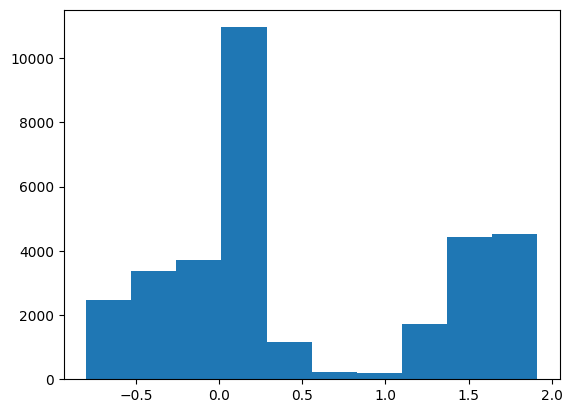

In [10]:
plt.hist(c)

In [11]:
delta_img = []

for layer in wide_network.layers.values():
    r = []
    for node in layer.neurons.values():
        r.append(node.state[0])
    delta_img.append(r)

128


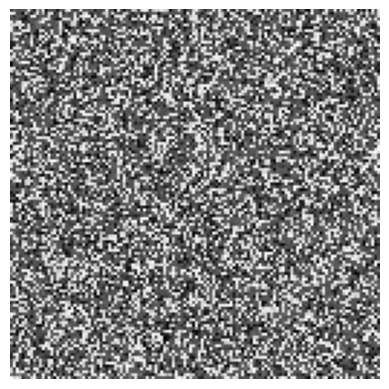

In [12]:
# Create an image using the data
size = int(len(delta_img[0]) ** 0.5)

img_one = delta_img[0]
data = np.array(img_one).reshape(size, size)

print(len(data))
plt.imshow(data, cmap='gray')  # 'gray' colormap for grayscale
plt.axis('off')  # Turn off axis

# Save the image
plt.savefig('output_image.png', bbox_inches='tight', pad_inches=0)

plt.show()